In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Import scikit-learn modules
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [2]:
Dry_Bean = pd.read_excel(r"C:\Sravan ML\ML_git\Random Forest\Dry_Bean_Dataset.xlsx")
Dry_Bean

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [3]:
Dry_Bean.isna().sum()   

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [4]:
x = Dry_Bean[['Area','Perimeter','MajorAxisLength','MinorAxisLength', 'AspectRation','Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2','ShapeFactor3','ShapeFactor4']]
y= Dry_Bean['Class']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=5)

In [6]:
rf=RandomForestClassifier()

In [7]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [8]:
rf.score(x_test, y_test)

0.9298567756151304

In [9]:
rf.score(x_train,y_train)

1.0

In [10]:
rf.predict(x_test)

array(['BARBUNYA', 'DERMASON', 'SEKER', ..., 'BARBUNYA', 'DERMASON',
       'SEKER'], dtype=object)

In [11]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [100, 115, 120],
              'max_depth': [9, 10, 11, 12],
              'max_features': [3, 4, 5, 6],
              'max_leaf_nodes': [9, 10, 11, 120]
              }
rf1= RandomForestClassifier()
rf1 = GridSearchCV(rf1, parameters)

In [12]:
rf1.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [9, 10, 11, 12],
                         'max_features': [3, 4, 5, 6],
                         'max_leaf_nodes': [9, 10, 11, 120],
                         'n_estimators': [100, 115, 120]})

In [13]:
rf1.best_params_

{'max_depth': 10,
 'max_features': 6,
 'max_leaf_nodes': 120,
 'n_estimators': 115}

In [14]:
rf1.score(x_train,y_train)

0.9500367376928729

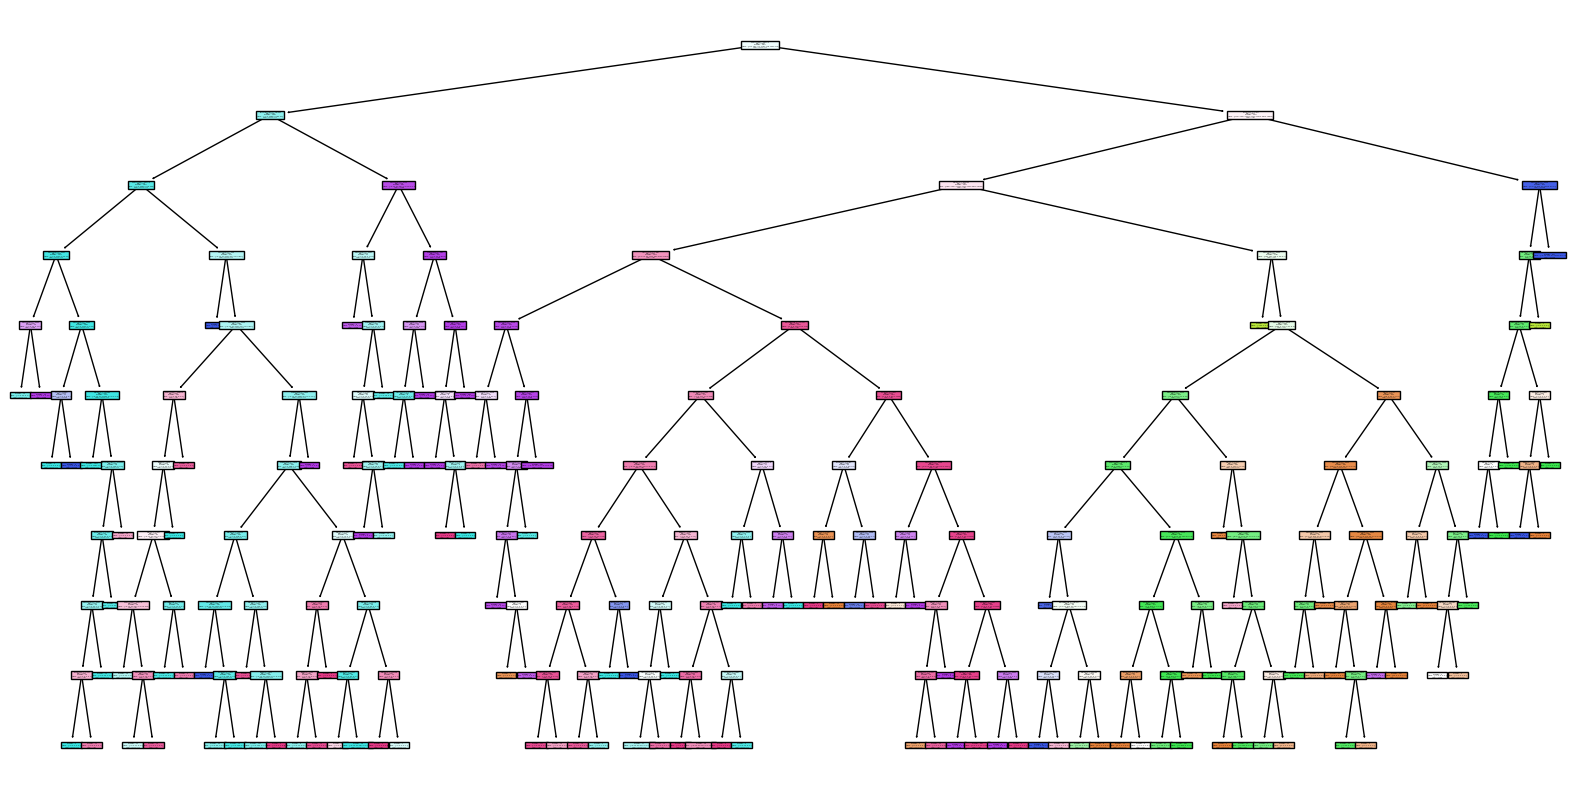

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Access the best estimator from the GridSearchCV results
best_rf_classifier = rf1.best_estimator_

# Access one of the decision trees from the random forest (let's say the first tree)
first_tree = best_rf_classifier.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Set the figure size as needed
plot_tree(first_tree, feature_names=x.columns, class_names=best_rf_classifier.classes_, filled=True)
plt.show()


In [18]:

# Define the parameter grid
parameters = {'n_estimators': [100, 115, 120],
              'max_depth': [9, 10, 11, 12],
              'max_features': [3, 4, 5, 6],
              'max_leaf_nodes': [9, 10, 11, 120]
              }

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=parameters)

# Fit the GridSearchCV to your training data
grid_search.fit(x_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [9, 10, 11, 12],
                         'max_features': [3, 4, 5, 6],
                         'max_leaf_nodes': [9, 10, 11, 120],
                         'n_estimators': [100, 115, 120]})

In [20]:
grid_search.best_params_   

{'max_depth': 12,
 'max_features': 4,
 'max_leaf_nodes': 120,
 'n_estimators': 100}

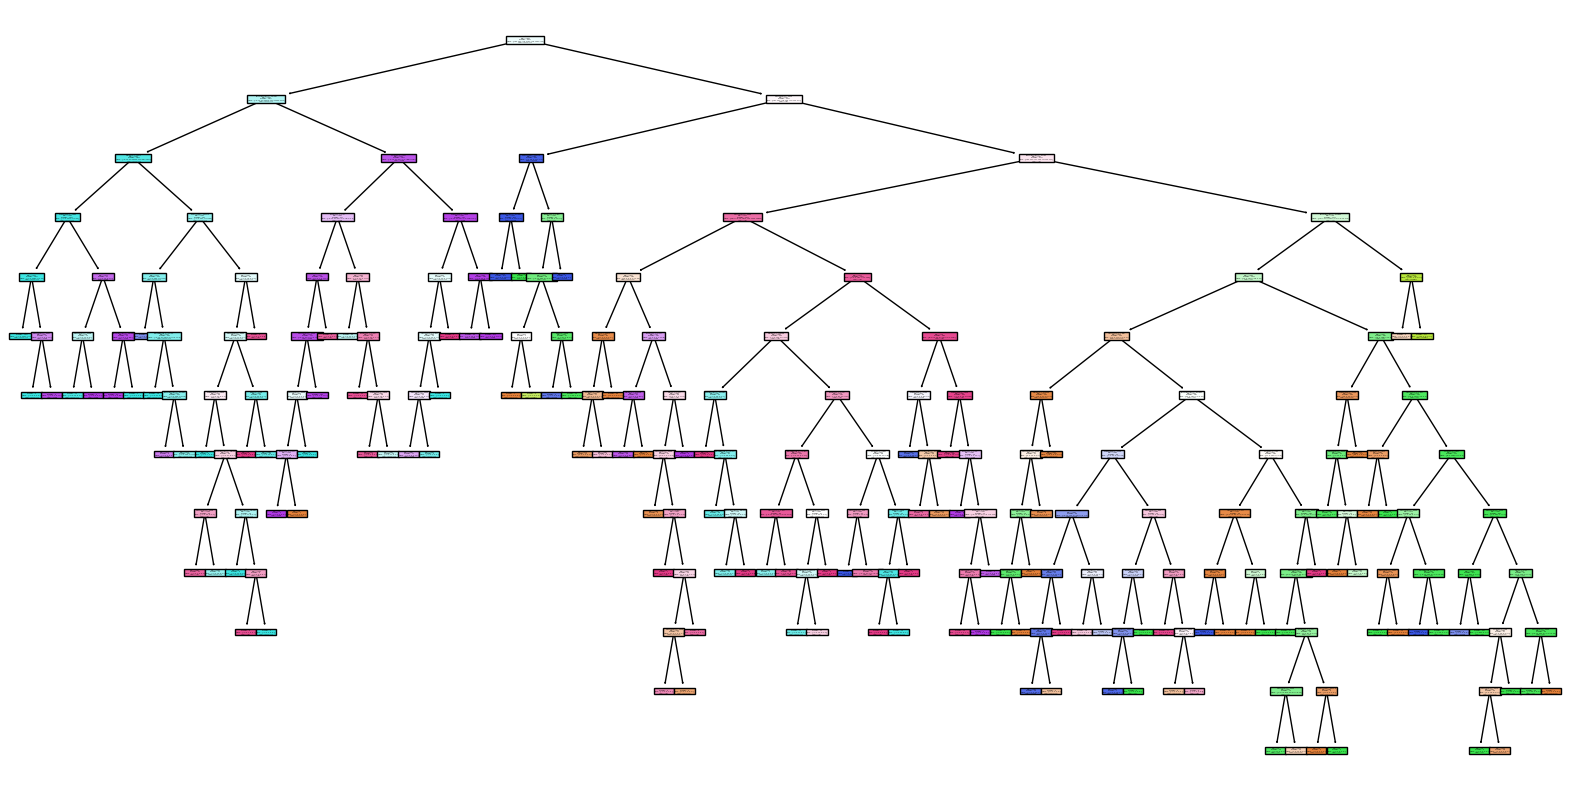

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Access the best estimator (RandomForestClassifier) from the grid search results
best_rf_classifier = grid_search.best_estimator_

# Access one of the decision trees from the random forest (let's say the first tree)
first_tree = best_rf_classifier.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(first_tree, feature_names=x.columns, class_names=best_rf_classifier.classes_, filled=True)
plt.show()  
